### 우리는 몇가지 모델의 성능을 비교해 볼 것이다.

In [1]:
import torchvision.models as models
resnet18 = models.resnet18(pretrained=True)
alexnet = models.alexnet(pretrained=True)
vgg16 = models.vgg16(pretrained=True)
densenet = models.densenet161(pretrained=True)


Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to C:\Users\HSM/.cache\torch\hub\checkpoints\resnet18-5c106cde.pth
100.0%
Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to C:\Users\HSM/.cache\torch\hub\checkpoints\alexnet-owt-4df8aa71.pth
100.0%
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\HSM/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100.0%
Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to C:\Users\HSM/.cache\torch\hub\checkpoints\densenet161-8d451a50.pth
99.4%

### torchvision.models에서 모델을 호출하고 pretrained된 모델을 사용하도록 한다.

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
%matplotlib inline

In [24]:
import torch
from torchvision import datasets, transforms as T

batch_size = 16

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=0)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


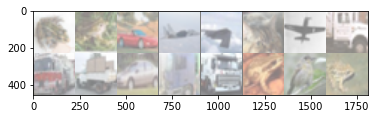

frog  frog  car   plane plane cat   plane truck truck truck car   truck truck frog  bird  frog 


In [25]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
#This is pyplot error solve code
#why this code have pyplot error? -> reason is 1. library crash 2. nomkl library not install 3. Too high numpy version

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [26]:
alexnet.to('cuda:0')

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [28]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to('cuda:0'), data[1].to('cuda:0')
        # calculate outputs by running images through the network
        outputs = alexnet(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 0 %
